En esta Practica vamos a alterar la base de datos de calificaciones para poder analizar los datos de manera efectiva. Primero importaremos los datos y veremos los tipos de variable de cada uno.

In [1]:
import pandas as pd

df=pd.read_csv('Calificaciones.csv')
print(df.dtypes)

Escuela           object
Sexo              object
Edad               int64
HorasDeEstudio     int64
Reprobadas         int64
Internet          object
Faltas             int64
G1                 int64
G2                 int64
G3                 int64
dtype: object


Podemos ver que hay varias que no tienen valor fijo. Estas las vamos a cambiar por valores booleanos.

In [2]:
import numpy as np
ind=np.where(df.dtypes==object)
for i in ind:
    dummy=pd.get_dummies(df.iloc[:,i],drop_first=True)
    df=pd.concat([df,dummy],axis=1)
    df=df.drop(df.columns[i],axis=1)

print(df)

     Edad  HorasDeEstudio  Reprobadas  Faltas  G1  G2  G3  Escuela_MS  Sexo_M  \
0      18               2           0       6   5   6   6       False   False   
1      17               2           0       4   5   5   6       False   False   
2      15               2           3      10   7   8  10       False   False   
3      15               3           0       2  15  14  15       False   False   
4      16               2           0       4   6  10  10       False   False   
..    ...             ...         ...     ...  ..  ..  ..         ...     ...   
390    20               2           2      11   9   9   9        True    True   
391    17               1           0       3  14  16  16        True    True   
392    21               1           3       3  10   8   7        True    True   
393    18               1           0       0  11  12  10        True    True   
394    19               1           0       5   8   9   9        True    True   

     Internet_yes  
0      

Ahora vamos a revisar si hay algun valor atipicos en las faltas

In [5]:
q1=df.Faltas.quantile(0.25)
q3=df.Faltas.quantile(0.75)
iqr=q3-q1
li=q1-1.5*iqr
ls=q3+1.5*iqr
out=np.where((df.Faltas<li)|(df.Faltas>ls))
print(df.iloc[out])

     Edad  HorasDeEstudio  Reprobadas  Faltas  G1  G2  G3  Escuela_MS  Sexo_M  \
40     16               2           1      25   7  10  11       False   False   
74     16               2           0      54  11  12  11       False   False   
103    15               2           0      26   7   6   6       False   False   
183    17               2           0      56   9   9   8       False   False   
198    17               1           1      24  18  18  18       False   False   
205    17               3           1      28  10   9   9       False   False   
216    17               2           2      22   6   6   4       False   False   
260    18               2           0      21  17  18  18       False   False   
276    18               2           0      75  10   9   9       False   False   
277    18               1           0      22   9   9   9       False    True   
280    17               1           0      30   8   8   8       False    True   
307    19               1   

Podemos observar que tenemos varios casos que parecen tener faltas, para evitar errores en nuestro modelo las los eliminaremos.

In [6]:
df= df[(df["Faltas"] >= li) & (df["Faltas"] <= ls)]

Asi ya eliminamos los datos de faltas que paresian ser errores. 


Ahora vamos a hacer un heatmap para ver que tanto se relacionan las variables que tenemos.

5 6
Mayor correlación entre: G2 y G3
Valor de correlación: 0.90


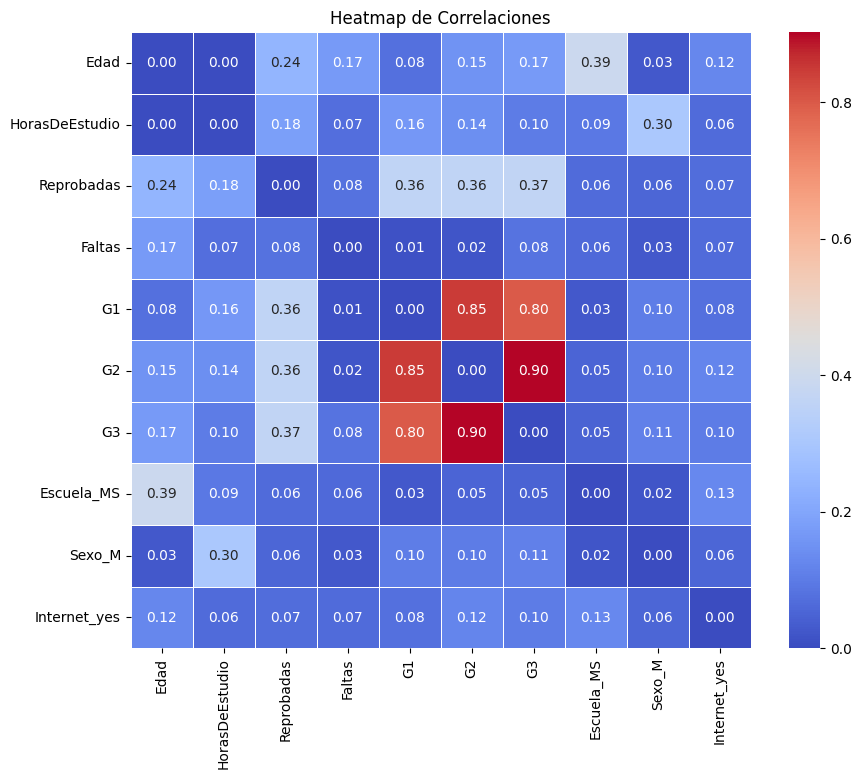

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

cor = abs(df.corr())
np.fill_diagonal(cor.values,0)
i, j = np.unravel_index(cor.values.argmax(), cor.shape)
print(i, j)
print(f"Mayor correlación entre: {cor.index[i]} y {cor.columns[j]}")
print(f"Valor de correlación: {cor.iloc[i, j]:.2f}")
plt.figure(figsize=(10, 8))
sns.heatmap(cor, cmap="coolwarm", annot=True, fmt=".2f", linewidths=0.5)
plt.title("Heatmap de Correlaciones")
plt.show()


Podemos observar una GRAN coorelacion entre nuesto G2 y nuestro G3 lo cual es algo bastante bueno ya que G3 sera nuestra variable de salida tambien hay una alta coorrelacion entre G1 y G1 y aunque pudieramos hacer algo al respecto no lo haremos para mantener la preciciom.

ahora para tratar de agregarle precicion al sistema vamos a hacer una coorelacion con las falas del estudiante y las horas de estudio que dedica.

In [ ]:

df["HorasDeEstudio_Faltas"] = df["HorasDeEstudio"] * df["Faltas"]
df["G2_G3"] = df["G2"] * df["G3"]
print(df.head(5))

(266, 11) (114, 11) (266,) (114,)
   Edad  HorasDeEstudio  Reprobadas  Faltas  G1  G2  G3  Escuela_MS  Sexo_M  \
0    18               2           0       6   5   6   6       False   False   
1    17               2           0       4   5   5   6       False   False   
2    15               2           3      10   7   8  10       False   False   
3    15               3           0       2  15  14  15       False   False   
4    16               2           0       4   6  10  10       False   False   

   Internet_yes  HorasDeEstudio_Faltas  G2_G3  
0         False                     12     36  
1          True                      8     30  
2          True                     20     80  
3          True                      6    210  
4         False                      8    100  


C:\Users\notli\AppData\Local\Temp\ipykernel_5840\1946936469.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["HorasDeEstudio_Faltas"] = df["HorasDeEstudio"] * df["Faltas"]
C:\Users\notli\AppData\Local\Temp\ipykernel_5840\1946936469.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["G2_G3"] = df["G2"] * df["G3"]


Ya con todos los datos alterados generamos nuestro modelo

In [17]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(df.drop('G3', axis=1), df.G3, test_size=0.2)
print(X_train.shape, X_test.shape, Y_train.shape, Y_test.shape)

from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(interaction_only=True, include_bias=False).fit(X_train)
X_train_I = pd.DataFrame(poly.transform(X_train), columns=poly.get_feature_names_out(X_train.columns))

from sklearn.linear_model import LinearRegression

model = LinearRegression().fit(X_train_I, Y_train)

(304, 11) (76, 11) (304,) (76,)


Ahora generaremos la grafica.

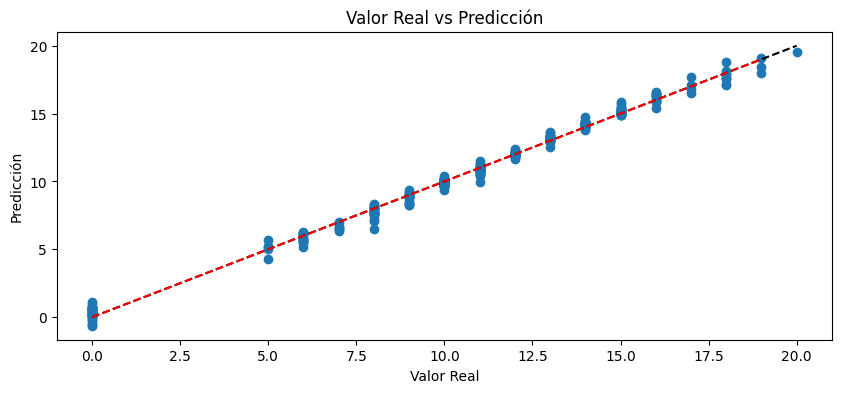

In [20]:
yHat = model.predict(X_train_I)

plt.figure(figsize=(10, 4))
plt.plot(Y_train, yHat, 'o')
plt.plot([0, 20], [0, 20], '--k')
plt.xlabel('Valor Real')
plt.ylabel('Predicción')
plt.title('Valor Real vs Predicción')
plt.plot([Y_test.min(), Y_test.max()], [Y_test.min(), Y_test.max()], color="red", linestyle="dashed")
plt.show()